In [12]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("Madrid 2022-02-08 to 2024-11-01.csv")
df2 = pd.read_csv("madrid 2019-04-08 to 2022-01-01.csv")
df3 =pd.read_csv("madrid 2022-01-02 to 2022-02-07.csv")
df = pd.concat([df, df2, df3], ignore_index=True)

X = df.drop(columns=["name","datetime","sunrise","sunset", "severerisk", "preciptype", "conditions", "description", "stations", "icon"], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Q1 = np.percentile(X_scaled, 25, axis=0)
Q3 = np.percentile(X_scaled, 75, axis=0)
IQR = Q3 - Q1
outliers_condition = ((X_scaled < (Q1 - 1.5 * IQR)) | (X_scaled > (Q3 + 1.5 * IQR)))

# Sustituir outliers con los valores más cercanos dentro del rango permitido
X_scaled_outliers_handled = np.copy(X_scaled)
for i in range(X_scaled.shape[1]):
    X_scaled_outliers_handled[:, i] = np.clip(X_scaled_outliers_handled[:, i], - 1.5 * IQR[i], Q3[i] + 1.5 * IQR[i])

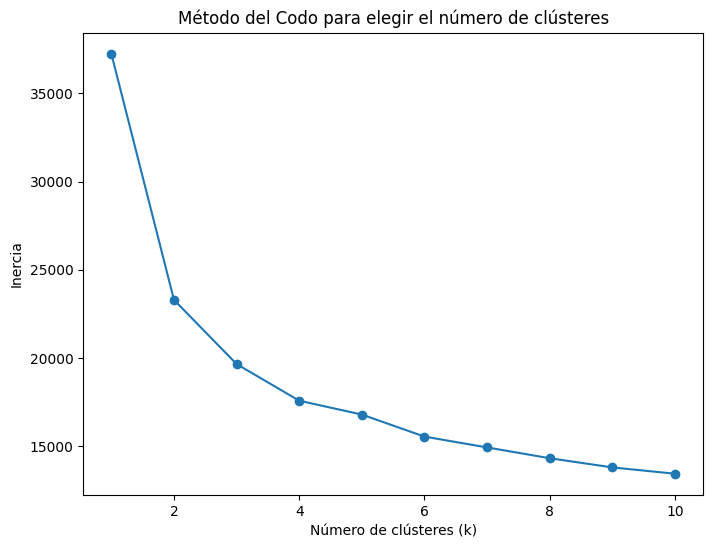

In [13]:
inertia = []  
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_outliers_handled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia para cada k (Método del Codo)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para elegir el número de clústeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.show()

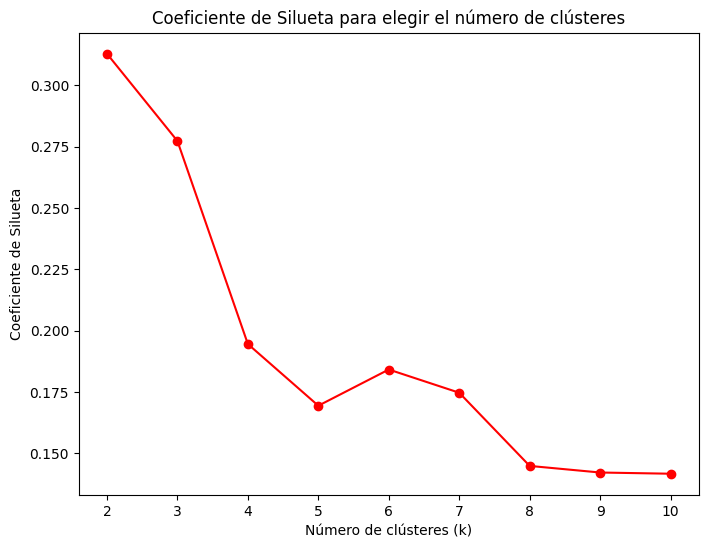

In [14]:
sil_scores = []  # Guardamos los coeficientes de silueta para cada k
for k in range(2, 11):  # El coeficiente de silueta solo es válido para k >= 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_outliers_handled)
    sil_score = silhouette_score(X_scaled_outliers_handled, kmeans.labels_)  # Calculamos el coeficiente de silueta
    sil_scores.append(sil_score)

# Graficar el coeficiente de silueta para cada k
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='red')
plt.title('Coeficiente de Silueta para elegir el número de clústeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Coeficiente de Silueta')
plt.show()

In [15]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled_outliers_handled)

KMeans(n_clusters=2, random_state=42)

Silhouette Score para el modelo con 2 clústeres: 0.31289473759574743


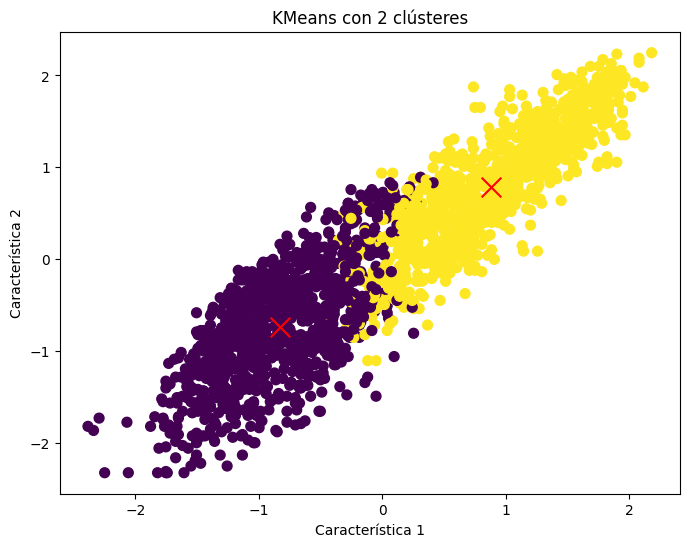

Número óptimo de clústeres según el Método del Codo y el Coeficiente de Silueta: 2
Centroides de los clústeres:
[[-8.28036178e-01 -7.34233359e-01 -8.11580725e-01 -8.23931455e-01
  -7.43527214e-01 -8.11173868e-01 -3.53237250e-01  7.19256309e-01
  -2.01000016e-01  3.43717522e-01  9.65265804e-02 -3.63973747e-02
  -1.89088062e-01 -4.69879411e-02 -3.32774762e-04  1.49322138e-02
   2.61977850e-01  4.52444292e-01 -2.18268840e-01 -7.53884655e-01
  -7.54061723e-01 -5.88764460e-01 -7.76379612e-03]
 [ 8.79211666e-01  7.81762672e-01  8.61863604e-01  8.75640311e-01
   7.90190294e-01  8.61393431e-01  4.10454279e-01 -7.63708827e-01
  -2.01000016e-01 -3.64960449e-01 -3.91399995e-01 -3.63973747e-02
  -1.89088062e-01 -1.47043042e-01 -1.59115772e-02 -1.58550760e-02
  -2.48991861e-01 -4.80406908e-01  3.74247664e-01  8.00477324e-01
   8.00665335e-01  6.58158544e-01  8.24362546e-03]]


In [16]:
sil_score_optimal = silhouette_score(X_scaled_outliers_handled, kmeans.labels_)
print(f"Silhouette Score para el modelo con {optimal_k} clústeres: {sil_score_optimal}")

# 7. Visualizar los resultados de KMeans
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled_outliers_handled[:, 0], X_scaled_outliers_handled[:, 1], c=kmeans.labels_, cmap='viridis', s=50)  # Graficamos los puntos de datos coloreados por su clúster
centroids = kmeans.cluster_centers_  # Los centroides de los clústeres
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)  # Graficamos los centroides en rojo
plt.title(f'KMeans con {optimal_k} clústeres')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# 8. Resultados finales
print(f'Número óptimo de clústeres según el Método del Codo y el Coeficiente de Silueta: {optimal_k}')
print('Centroides de los clústeres:')
print(kmeans.cluster_centers_)